In [1]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import random
import pandas as pd
from matplotlib import pyplot 
from scipy.integrate import odeint 
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib.collections import LineCollection
from scipy.stats import norm
import seaborn as sns
from sklearn.mixture import GaussianMixture
from scipy.integrate import odeint
from matplotlib.backends.backend_pdf import PdfPages
from scipy.interpolate import RectBivariateSpline
import matplotlib
from matplotlib.offsetbox import AnchoredText
from matplotlib.ticker import MaxNLocator
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline

In [2]:
# 对尺寸和 dpi参数进行调整
plt.rcParams['figure.dpi'] = 300
# 字体调整
plt.rcParams['font.sans-serif'] = ['Arial']  # 如果要显示中文字体,则在此处设为：simhei,Arial Unicode MS
plt.rcParams['font.weight'] = 'light'
plt.rcParams['axes.unicode_minus'] = False  # 坐标轴负号显示
plt.rcParams['axes.titlesize'] = 12  # 标题字体大小
plt.rcParams['axes.labelsize'] = 8  # 坐标轴标签字体大小
plt.rcParams['xtick.labelsize'] = 8  # x轴刻度字体大小
plt.rcParams['ytick.labelsize'] = 8  # y轴刻度字体大小
plt.rcParams['legend.fontsize'] = 8
# 线条调整
plt.rcParams['axes.linewidth'] = 1
# 刻度在内，设置刻度字体大小
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
# 设置输出格式为PDF
plt.rcParams['savefig.format'] = 'pdf'
plt.rcParams['figure.autolayout'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [12]:
#可选是否读取final_positions
#final_positions = pd.read_excel(r'D:\Study\pycharm_code\SSA240319\delay_finalpositions.xlsx')
final_positions = pd.read_excel(r'D:\Study\pycharm_code\SSA240918\output\a1315de05_finalpositions_30416561.xlsx')
final_positions = final_positions.drop(final_positions.columns[0],axis=1)#去除第一列索引
final_positions = final_positions.values

In [13]:
def plot_probability_and_potential(final_positions):
    
    #计算网格概率
    x=final_positions[:, 0]
    y=final_positions[:, 1]
    x_grid = np.arange(0, 801, 40)#设置小网格
    y_grid = np.arange(0, 801, 40)
    counts, _, _ = np.histogram2d(x, y, bins=[x_grid, y_grid])
    total_counts = np.sum(counts)
    probabilities = counts / total_counts
    #计算势
    U=-np.log(probabilities+1e-10)
    
    #第一张图：probabilities
    fig1, ax1 = plt.subplots(num=1, figsize=(3.5,2.9), dpi=300)
    x_grid = x_grid[:-1]
    y_grid = y_grid[:-1]
    X, Y = np.meshgrid(x_grid, y_grid)
    #contour = plt.contourf(X,Y,probabilities,levels=100, cmap='coolwarm', interpolation='spline16')
    contour = ax1.imshow(probabilities.T, extent=[0, 800, 0, 800], cmap='coolwarm', interpolation='spline16', origin='lower')
    #设置等高线
    #C = plt.contour(X, Y, probabilities, colors='black', linewidths=0.5)
    #ax1.clabel(C, inline=True, fontsize=8)
    cbar = plt.colorbar(contour)
    #cbar.set_label('Probability')
    ax1.xaxis.set_major_locator(MaxNLocator(4))
    ax1.yaxis.set_major_locator(MaxNLocator(4))
    ax1.set_xlim(0, 800)
    ax1.set_ylim(0, 800)
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    
    #第二张图：potential
    fig2, ax2 = plt.subplots(num=2, figsize=(3.5,2.9), dpi=300, subplot_kw={"projection": "3d"})
    # 创建插值函数
    f = RectBivariateSpline(x_grid, y_grid, U)
    # 创建更密集的网格点
    x_dense = np.arange(0, 800, 20)
    y_dense = np.arange(0, 800, 20)
    X_dense, Y_dense = np.meshgrid(x_dense, y_dense)
    # 进行插值
    U_dense = f(x_dense, y_dense)
    
    #ax2 = fig2.add_subplot(111, projection='3d')
    # 绘制平滑后的三维表面图
    surf = ax2.plot_surface(X_dense, Y_dense, U_dense, cmap='autumn', edgecolor='none')
    # 设置坐标轴标签
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('U')
    mappable = plt.cm.ScalarMappable(cmap='autumn')
    mappable.set_array(U_dense)
    cbar = plt.colorbar(mappable, ax=ax2, shrink=0.8)
    #设置三维图角度，elev上下，azim左右
    ax2.view_init(elev=30, azim=225)
    
    return fig1, fig2

In [14]:
#改图
def probability_distribution1(final_positions):
        
    # 最终位置
    txt = 'X high: {}/{}'.format(3041, 6561) #需要输入
    anchored_text1 = AnchoredText(txt, loc=1, frameon=None, prop={'size': 8})
    anchored_text2 = AnchoredText(txt, loc=1, frameon=None, prop={'size': 8})

    fig1, ax1 = plt.subplots(num=1, figsize=(3.1, 1.3), dpi=300)
    # 绘制直方图
    ax1.hist(final_positions[:, 0], bins=80, density=True, alpha=0.75)
    # 拟合混合高斯分布曲线
    gmm = GaussianMixture(n_components=2)
    gmm.fit(final_positions[:, 0].reshape(-1, 1))
    x_vals = np.linspace(0,800, 800).reshape(-1, 1)
    y_vals = np.exp(gmm.score_samples(x_vals)).ravel()
    ax1.plot(x_vals, y_vals, 'r-', label='Fitted Gaussian Mixture Distribution')

    ax1.set_xlim(0, 800)
    ax1.set_ylim(0, 0.1)
    #ax1.text(500, 0.04, txt, bbox=dict(facecolor ='white'))
    ax1.xaxis.set_major_locator(MaxNLocator(4))
    ax1.yaxis.set_major_locator(MaxNLocator(2))
    ax1.set_xlabel('X')
    ax1.set_ylabel('Density')
    ax1.add_artist(anchored_text1) 

    fig2, ax2 = plt.subplots(num=2, figsize=(3.1, 1.3), dpi=300)
    # 绘制直方图
    ax2.hist(final_positions[:, 1], bins=80, density=True, alpha=0.75)
    # 拟合混合高斯分布曲线
    gmm = GaussianMixture(n_components=2)
    gmm.fit(final_positions[:, 1].reshape(-1, 1))
    x_vals = np.linspace(0, 800, 800).reshape(-1, 1)
    y_vals = np.exp(gmm.score_samples(x_vals)).ravel()
    ax2.plot(x_vals, y_vals, 'r-', label='Fitted Gaussian Mixture Distribution')

    ax2.set_xlim(0, 800)
    ax2.set_ylim(0, 0.1)
    #ax2.text(500, 0.04, txt, bbox=dict(facecolor ='white'))
    ax2.xaxis.set_major_locator(MaxNLocator(4))
    ax2.yaxis.set_major_locator(MaxNLocator(2))
    ax2.set_xlabel('Y')
    ax2.set_ylabel('Density')
    ax2.add_artist(anchored_text2) 

    return fig1,fig2

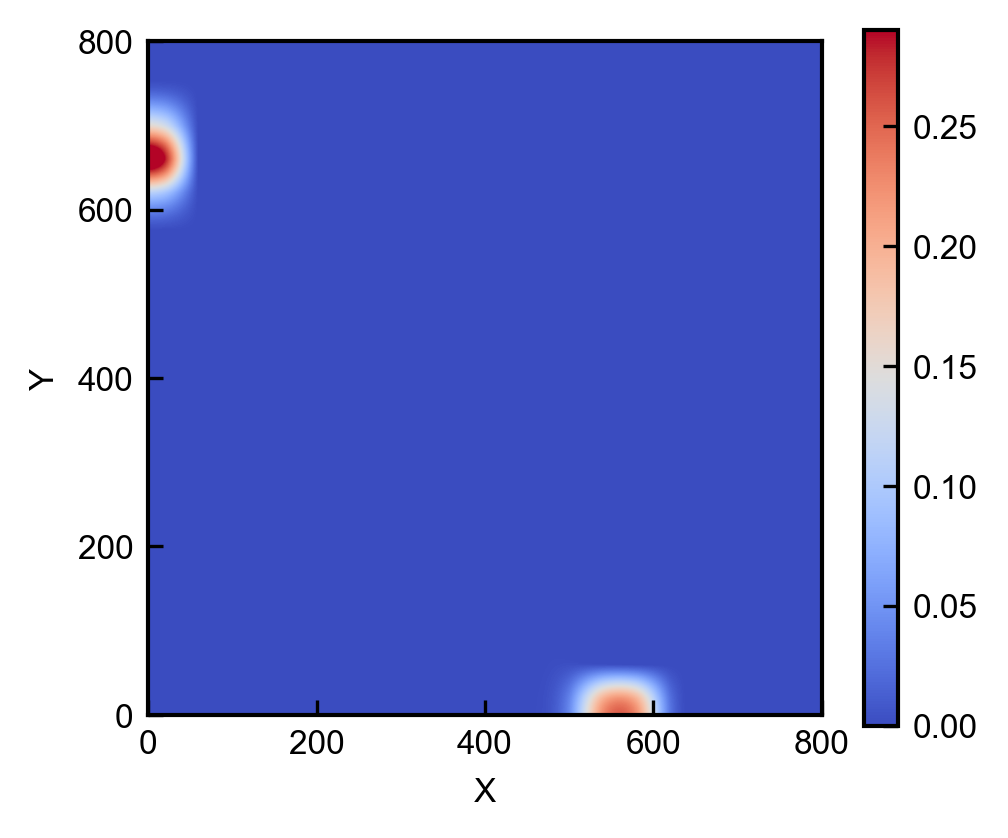

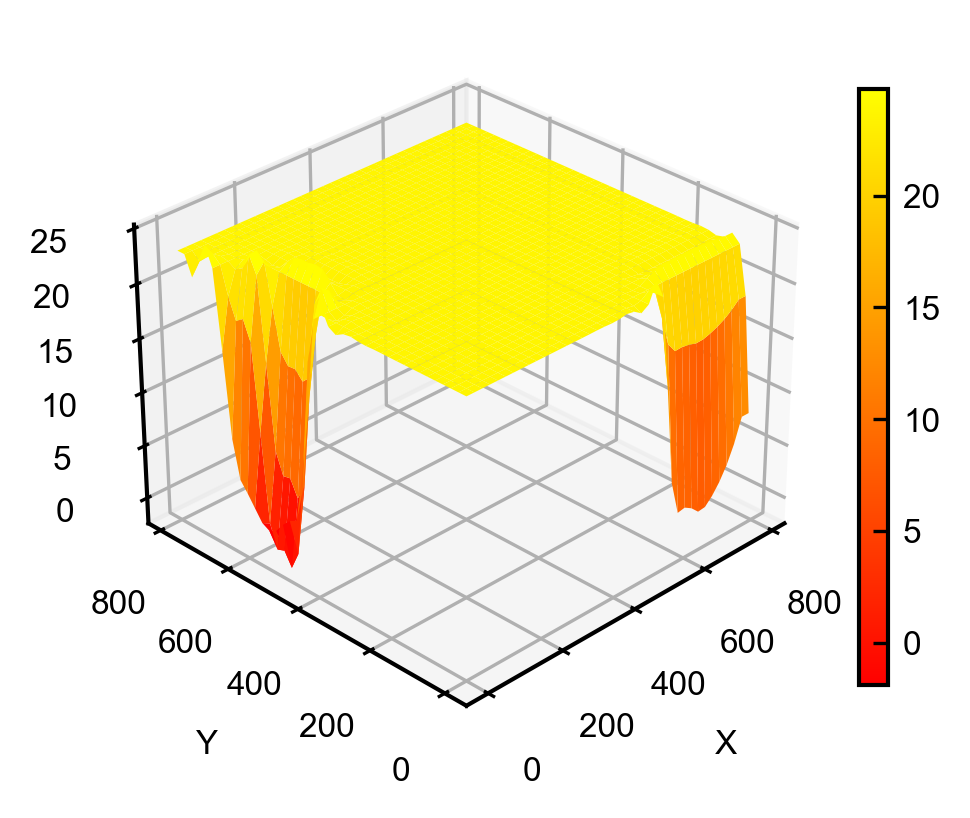

In [15]:
fig1,fig2 = plot_probability_and_potential(final_positions)
fig1.savefig('a1315de05_probabilities.pdf')
fig2.savefig('a1315de05_potential.pdf')
plt.show()   

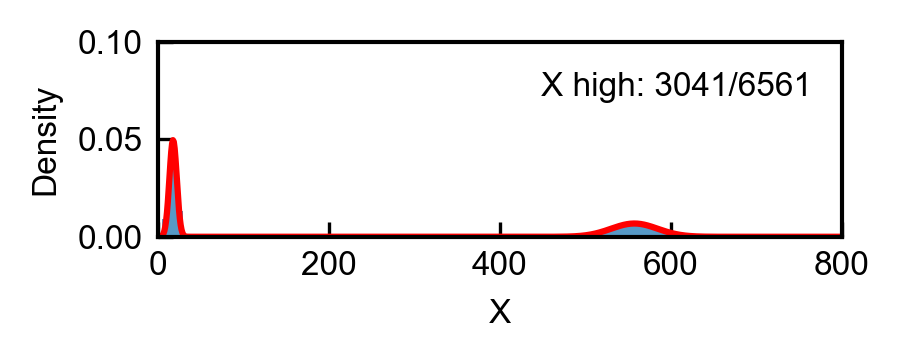

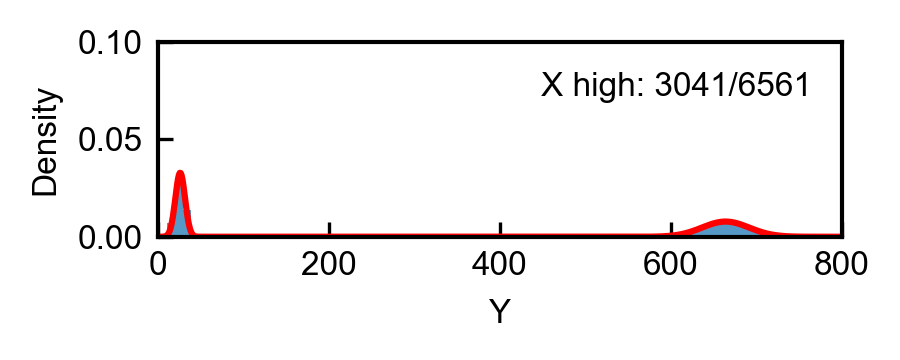

In [16]:
fig3,fig4=probability_distribution1(final_positions)
fig3.savefig('a1315de05_pdfX.pdf')
fig4.savefig('a1315de05_pdfY.pdf')
plt.show()   